In [1]:
%reset
%matplotlib inline

import netCDF4 as nc
import cmocean
import numpy as np
import xarray as xr
import xrft
from xgcm import Grid
import matplotlib.pyplot as plt
import scipy.interpolate

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


### Reading in data for hmix=5:

In [2]:
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
# fs_025 = xr.open_dataset('static.nc', decode_times=False)
# av_025 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/
# fs_0125 = xr.open_dataset('static.nc', decode_times=False)
# av_0125 = xr.open_dataset('averages_00004502.nc', decode_times=False)

# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/
# fs_00625 = xr.open_dataset('static.nc', decode_times=False)
# av_00625 = xr.open_dataset('averages_00004502.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5/
fs_003125 = xr.open_dataset('static.nc', decode_times=False)
av_003125 = xr.open_dataset('averages_00002702.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


### Reading in data for parameterized runs

In [3]:
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/
%ls

/glade/p/univ/unyu0004/eyankovsky/MEKE_testing
BTBS_default/  BTBS_test22/                 MEKE_simple6/  MEKE_test21/
BTBS_test1/    BTBS_test23/                 MEKE_simple7/  MEKE_test22/
BTBS_test10/   BTBS_test26/                 MEKE_test1/    MEKE_test23/
BTBS_test11/   BTBS_test27/                 MEKE_test10/   MEKE_test24/
BTBS_test12/   BTBS_test3/                  MEKE_test11/   MEKE_test25/
BTBS_test13/   BTBS_test4/                  MEKE_test12/   MEKE_test26/
BTBS_test14/   BTBS_test5/                  MEKE_test13/   MEKE_test27/
BTBS_test15/   BTBS_test6/                  MEKE_test14/   MEKE_test3/
BTBS_test16/   default_noparameterization/  MEKE_test15/   MEKE_test4/
BTBS_test17/   MEKE_GM_BS_default/          MEKE_test16/   MEKE_test5/
BTBS_test18/   MEKE_simple1/                MEKE_test17/   MEKE_test6/
BTBS_test19/   MEKE_simple2/                MEKE_test18/   MEKE_test7/
BTBS_test2/    MEKE_simple3/                MEKE_test19/   MEKE_test8/
BTBS_test20/   MEKE_sim

In [4]:
##Unparameterized run
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
fs_05 = xr.open_dataset('static.nc', decode_times=False)
av_05 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

##Increasing GM and BS
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_GM_BS_default/
av_05_GMBS1 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test5
av_05_GMBS2 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test6
av_05_GMBS3 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test13
av_05_GMBS4 = xr.open_dataset('averages_00031502.nc', decode_times=False)  


##Increasing BS
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test26
av_05_BS1 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test15
av_05_BS2 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test27
av_05_BS3 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test16
av_05_BS4 = xr.open_dataset('averages_00031502.nc', decode_times=False)  


##Increasing GM
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test24
av_05_GM1 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test25
av_05_GM2 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test7
av_05_GM3 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test8
av_05_GM4 = xr.open_dataset('averages_00031502.nc', decode_times=False)  




/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_GM_BS_default
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test5
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test6
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test13
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test26
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test15
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test27
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test16
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test24
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test25
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test7
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test8


In [5]:
grid_05= Grid(av_05, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});

grid_003125= Grid(av_003125, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});


#Interpolating surface u,v to be on the same grid points. Using only 100 days, or 20 time steps:


dx_003125= grid_003125.interp(fs_003125.dxCu,axis='X'); dy_003125= grid_003125.interp(fs_003125.dyCv,axis='Y')
u_003125 = grid_003125.interp(av_003125.SSU[0:20,:,:],axis='X'); 
v_003125 = grid_003125.interp(av_003125.SSV[0:20,:,:],axis='Y')

dx_05= grid_05.interp(fs_05.dxCu,axis='X'); dy_05= grid_05.interp(fs_05.dyCv,axis='Y')

v_05 = grid_05.interp(av_05.SSV[0:20,:,:],axis='Y'); u_05 = grid_05.interp(av_05.SSU[0:20,:,:],axis='X');
v_05_GMBS1 = grid_05.interp(av_05_GMBS1.SSV[0:20,:,:],axis='Y'); u_05_GMBS1 = grid_05.interp(av_05_GMBS1.SSU[0:20,:,:],axis='X');
v_05_GMBS2 = grid_05.interp(av_05_GMBS2.SSV[0:20,:,:],axis='Y'); u_05_GMBS2 = grid_05.interp(av_05_GMBS2.SSU[0:20,:,:],axis='X');
v_05_GMBS3 = grid_05.interp(av_05_GMBS3.SSV[0:20,:,:],axis='Y'); u_05_GMBS3 = grid_05.interp(av_05_GMBS3.SSU[0:20,:,:],axis='X');
v_05_GMBS4 = grid_05.interp(av_05_GMBS4.SSV[0:20,:,:],axis='Y'); u_05_GMBS4 = grid_05.interp(av_05_GMBS4.SSU[0:20,:,:],axis='X');

v_05_GM1 = grid_05.interp(av_05_GM1.SSV[0:20,:,:],axis='Y'); u_05_GM1 = grid_05.interp(av_05_GM1.SSU[0:20,:,:],axis='X');
v_05_GM2 = grid_05.interp(av_05_GM2.SSV[0:20,:,:],axis='Y'); u_05_GM2 = grid_05.interp(av_05_GM2.SSU[0:20,:,:],axis='X');
v_05_GM3 = grid_05.interp(av_05_GM3.SSV[0:20,:,:],axis='Y'); u_05_GM3 = grid_05.interp(av_05_GM3.SSU[0:20,:,:],axis='X');
v_05_GM4 = grid_05.interp(av_05_GM4.SSV[0:20,:,:],axis='Y'); u_05_GM4 = grid_05.interp(av_05_GM4.SSU[0:20,:,:],axis='X');

v_05_BS1 = grid_05.interp(av_05_BS1.SSV[0:20,:,:],axis='Y'); u_05_BS1 = grid_05.interp(av_05_BS1.SSU[0:20,:,:],axis='X');
v_05_BS2 = grid_05.interp(av_05_BS2.SSV[0:20,:,:],axis='Y'); u_05_BS2 = grid_05.interp(av_05_BS2.SSU[0:20,:,:],axis='X');
v_05_BS3 = grid_05.interp(av_05_BS3.SSV[0:20,:,:],axis='Y'); u_05_BS3 = grid_05.interp(av_05_BS3.SSU[0:20,:,:],axis='X');
v_05_BS4 = grid_05.interp(av_05_BS4.SSV[0:20,:,:],axis='Y'); u_05_BS4 = grid_05.interp(av_05_BS4.SSU[0:20,:,:],axis='X');



In [6]:
print(v_05.shape)


(20, 280, 120)


In [7]:
# #Plotting Surface KE 
# fig = plt.figure(figsize=(4, 7), dpi=150, facecolor='w', edgecolor='k')
# ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
# ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
# ax1.set_facecolor((0.92, 0.92, 0.92))
# ax1.set_title('1/32$^\circ$ Surface KE',fontsize=14)

# ax1.set_xlabel('Longitude',fontsize=16)
# ax1.set_ylabel('Latitude',fontsize=16)
# ax1.tick_params(labelsize=16); 
# ax2.tick_params(labelsize=14)
# ax2.set_title('$log_{10}(m^2/s^2)$',fontsize=11)


# levels=np.linspace(-5,0,11)
# plotted =ax1.contourf(u_003125.xh,u_003125.yh,np.log10(0.5*(u_003125[-1]**2+v_003125[-1]**2)),levels=levels,cmap=cmocean.cm.matter_r,extend='both')

# ax1.set_aspect('equal', 'box')
# cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
# cbar.ax.tick_params(labelsize=14);
# #
# plt.show()

## We will now change the x-coordinates to be in units of meters rather than degrees.

In [8]:
xi_05=dx_05.cumsum(axis=1)-dx_05[:,0]
xi_003125=dx_003125.cumsum(axis=1)-dx_003125[:,0]

In [11]:
print(fs_05.geolat[240,0])

<xarray.DataArray 'geolat' ()>
array(50.25)
Coordinates:
    xh       float64 0.25
    yh       float64 50.25
Attributes:
    long_name:     Latitude of tracer (T) points
    units:         degrees_north
    cell_methods:  time: point


### Computing the 1D spectrum at 50 deg. North using full velocity


In [28]:
boundary=5 #cutting this number of points off of each boundary. 
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    

    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
    
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GMBS1[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_GMBS1[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    

    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GMBS1=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       

for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GMBS2[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_GMBS2[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    

    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GMBS2=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi) 
    
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GMBS3[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_GMBS3[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)  
    
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GMBS3=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)     
    
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GMBS4[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_GMBS4[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    

    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GMBS4=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       



    
boundary=80 #cutting this number of points off of each boundary. 
for i in range(3840,3841):
    xline= xi_003125[i,boundary:-boundary]
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_003125[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)  
    
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_003125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    centroid_003125 = np.nansum(ekeiso_003125*wavenumber_003125)/np.nansum(ekeiso_003125)
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)
    


Text(0, 0.5, '[m$^3$ s$^{-2}$]')

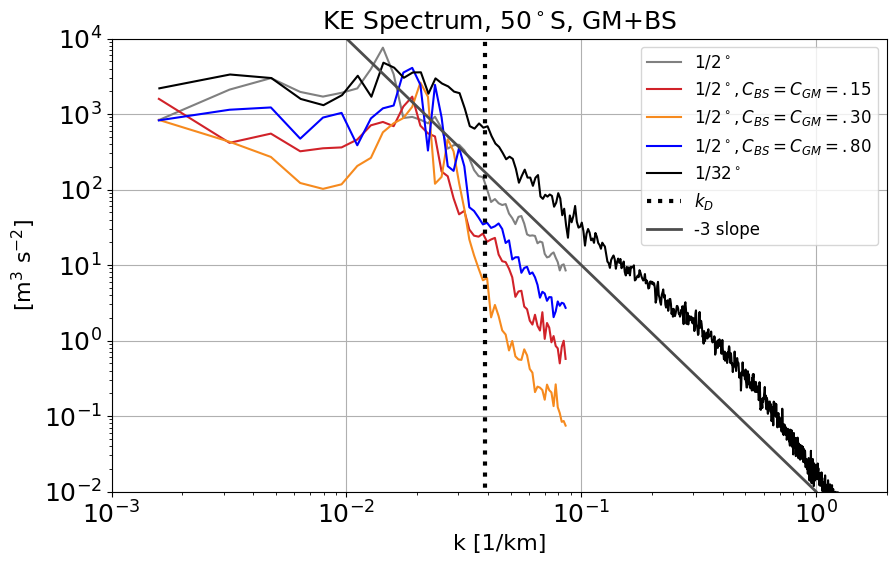

In [29]:
fig, ax = plt.subplots(figsize=(10,6),dpi=100)

plt.plot(wavenumber_05,ekeiso_05,'-',color=[0.5, 0.5, 0.5],label='$1/2^\circ$')
plt.plot(wavenumber_05,ekeiso_05_GMBS1,'-',color='#D12229',label='$1/2^\circ,C_{BS}=C_{GM}=.15$')
plt.plot(wavenumber_05,ekeiso_05_GMBS2,'-',color='#F68A1E',label='$1/2^\circ,C_{BS}=C_{GM}=.30$')
#plt.plot(wavenumber_05,ekeiso_05_GMBS3,'-',color='#FDE01A',label='$1/2^\circ,C_{BS}=C_{GM}=.50$')
plt.plot(wavenumber_05,ekeiso_05_GMBS4,'-',color='b',label='$1/2^\circ,C_{BS}=C_{GM}=.80$')
#plt.plot(wavenumber_025,ekeiso_025,'-',color=[0,0,0.5],label='$1/4^\circ$')
plt.plot(wavenumber_003125,ekeiso_003125,color='k',label='$1/32^\circ$')

plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-7,1e4],':k',linewidth=3,label='$k_D$')
plt.plot([1e-2,1e0], [1e4,1e-2],color=[.3,.3,.3],linewidth=2,label='-3 slope')

plt.xscale('log')
plt.yscale('log')
plt.title('KE Spectrum, 50$^\circ$N, GM+BS',fontsize=18)
plt.ylim([1e-2, 1e4]); plt.xlim([1e-3, 2e0])

plt.grid()
plt.legend(fontsize=12,loc='upper right')

plt.tick_params(labelsize=18);
ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)

In [30]:
boundary=5 #cutting this number of points off of each boundary. 
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    

    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
    
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS1[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_BS1[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    

    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_BS1=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       

for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS2[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_BS2[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    

    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_BS2=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS3[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_BS3[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    

    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_BS3=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS4[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_BS4[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    

    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_BS4=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       




boundary=80 #cutting this number of points off of each boundary. 
for i in range(3840,3841):
    xline= xi_003125[i,boundary:-boundary]
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_003125[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_003125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    centroid_003125 = np.nansum(ekeiso_003125*wavenumber_003125)/np.nansum(ekeiso_003125)
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)
    


Text(0, 0.5, '[m$^3$ s$^{-2}$]')

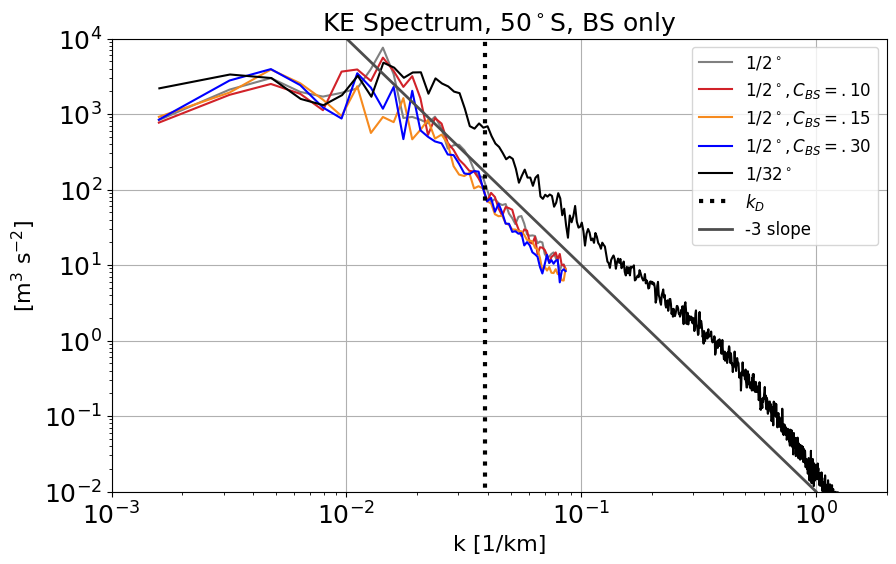

In [31]:
fig, ax = plt.subplots(figsize=(10,6),dpi=100)

plt.plot(wavenumber_05,ekeiso_05,'-',color=[0.5, 0.5, 0.5],label='$1/2^\circ$')
plt.plot(wavenumber_05,ekeiso_05_BS1,'-',color='#D12229',label='$1/2^\circ,C_{BS}=.10$')
plt.plot(wavenumber_05,ekeiso_05_BS2,'-',color='#F68A1E',label='$1/2^\circ,C_{BS}=.15$')
#plt.plot(wavenumber_05,ekeiso_05_BS3,'-',color='#FDE01A',label='$1/2^\circ,C_{BS}=.20$')
plt.plot(wavenumber_05,ekeiso_05_BS4,'-',color='b',label='$1/2^\circ,C_{BS}=.30$')
#plt.plot(wavenumber_025,ekeiso_025,'-',color=[0,0,0.5],label='$1/4^\circ$')
plt.plot(wavenumber_003125,ekeiso_003125,color='k',label='$1/32^\circ$')

plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-7,1e4],':k',linewidth=3,label='$k_D$')
plt.plot([1e-2,1e0], [1e4,1e-2],color=[.3,.3,.3],linewidth=2,label='-3 slope')

plt.xscale('log')
plt.yscale('log')
plt.title('KE Spectrum, 50$^\circ$N, BS only',fontsize=18)
plt.ylim([1e-2, 1e4]); plt.xlim([1e-3, 2e0])

plt.grid()
plt.legend(fontsize=12,loc='upper right')

plt.tick_params(labelsize=18);
ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)

In [34]:
boundary=5 #cutting this number of points off of each boundary. 
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
    
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GM1[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_GM1[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GM1=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       

for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GM2[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_GM2[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)  
    
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GM2=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)    
    
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GM3[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_GM3[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GM3=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GM4[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_05_GM4[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GM4=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       



    
boundary=80 #cutting this number of points off of each boundary. 
for i in range(3840,3841):
    xline= xi_003125[i,boundary:-boundary]
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uline= u_003125[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline)    
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()  
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso = .5*(viso2+uiso2).mean('time') #Computing the mean spectrum
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)
   


Text(0, 0.5, '[m$^3$ s$^{-2}$]')

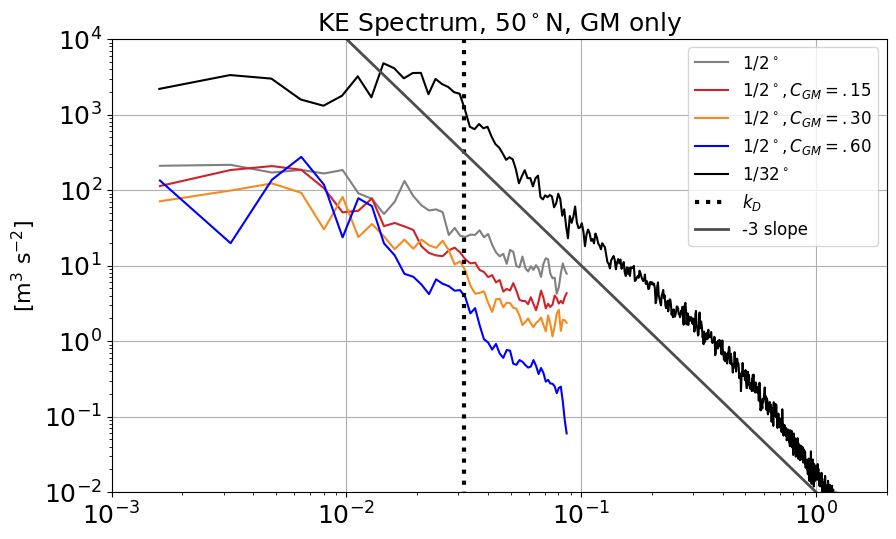

In [35]:
fig, ax = plt.subplots(figsize=(10,6),dpi=100)

plt.plot(wavenumber_05,ekeiso_05,'-',color=[0.5, 0.5, 0.5],label='$1/2^\circ$')
plt.plot(wavenumber_05,ekeiso_05_GM1,'-',color='#D12229',label='$1/2^\circ,C_{GM}=.15$')
plt.plot(wavenumber_05,ekeiso_05_GM2,'-',color='#F68A1E',label='$1/2^\circ,C_{GM}=.30$')
#plt.plot(wavenumber_05,ekeiso_05_GM3,'-',color='#FDE01A',label='$1/2^\circ,C_{GM}=.50$')
plt.plot(wavenumber_05,ekeiso_05_GM4,'-',color='b',label='$1/2^\circ,C_{GM}=.60$')
#plt.plot(wavenumber_025,ekeiso_025,'-',color=[0,0,0.5],label='$1/4^\circ$')
plt.plot(wavenumber_003125,ekeiso_003125,color='k',label='$1/32^\circ$')

plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-7,1e4],':k',linewidth=3,label='$k_D$')
plt.plot([1e-2,1e0], [1e4,1e-2],color=[.3,.3,.3],linewidth=2,label='-3 slope')

plt.xscale('log')
plt.yscale('log')
plt.title('KE Spectrum, 50$^\circ$N, GM only',fontsize=18)
plt.ylim([1e-2, 1e4]); plt.xlim([1e-3, 2e0])

plt.grid()
plt.legend(fontsize=12,loc='upper right')

plt.tick_params(labelsize=18);
#ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)

In [13]:
print(fs_025.geolat[340,0])

<xarray.DataArray 'geolat' ()>
array(15.125)
Coordinates:
    xh       float64 0.125
    yh       float64 15.12
Attributes:
    long_name:     Latitude of tracer (T) points
    units:         degrees_north
    cell_methods:  time: point
